# Objectives of the Analysis:


(1). Import the required libraries

(2). Load the dataset into a pandas dataframe

(3). Examine the properties of the dataset

(4). Perform EDA on the dataset to visualize the relationship between variables and draw relevant insghts

In [1]:
# To load in the dataset
import pandas as pd

# To visualize the data
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("uber-raw-data-sep14.csv")

# Print the 5 observations
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [3]:
# print the last 5 observation
df.tail()

,Date/Time,Lat,Lon,Base
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764


In [4]:
# Print the properties or descriptions of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [6]:
# Display the total number rows and columns in the dataset
print(df.shape)

(1028136, 4)


In [5]:
# check if there is any null value in the dataset
df.isnull().any()

Date/Time    False
Lat          False
Lon          False
Base         False
dtype: bool

# Now its time to perform Data Wrangling or Data Manipulation

Let's divide the Date/Time column into "Day", "Hour", & "Weekday".

In [7]:
# Change the "Date/Time" columns's data type from string to datetime
df["Date/Time"] = pd.to_datetime(df["Date/Time"])

# Convert "Date/Time" column from string data type into DateTime
df["Day"] = df["Date/Time"].apply(lambda x: x.day)
df["Hour"] = df["Date/Time"].apply(lambda x: x.hour)
df["Weekday"] = df["Date/Time"].apply(lambda x: x.weekday())

# Let check if these chnages have been effected on the dataset
print(df.head())

            Date/Time      Lat      Lon    Base  Day  Hour  Weekday
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512    1     0        0
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512    1     0        0
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512    1     0        0
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512    1     0        0
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512    1     0        0


In [8]:
df.head()

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


# Now we can check the density of rides according to days, hours, and weekdays

Text(0, 0.5, 'Density of Rides')

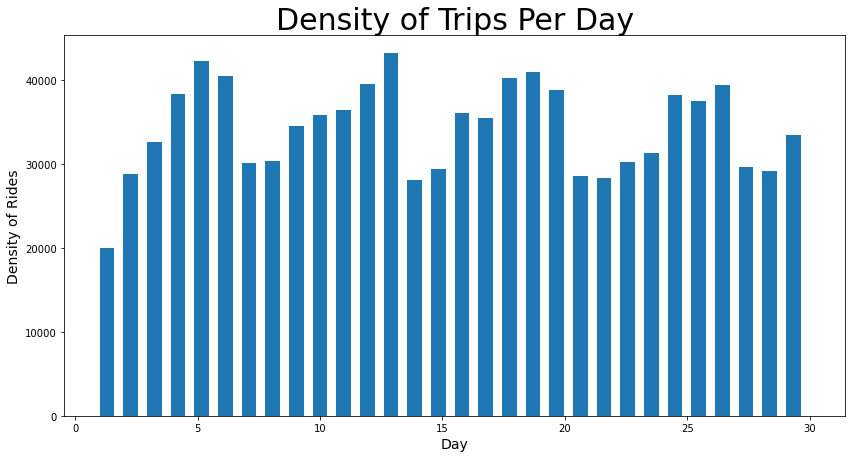

In [9]:
# Visualize the Density of rides per Day of Month using Matplotlib
fig, ax = plt.subplots(figsize = (14, 7))
plt.hist(df.Day, width = 0.6, bins = 30)
plt.title("Density of Trips Per Day", fontsize = 30)
plt.xlabel("Day", fontsize = 14)
plt.ylabel("Density of Rides", fontsize = 14)

From the above plot we can observe that the highest number of rides are during working days (Monday to Friday), while the least number of rides are in weekends.

Text(0, 0.5, 'Density of Rides')

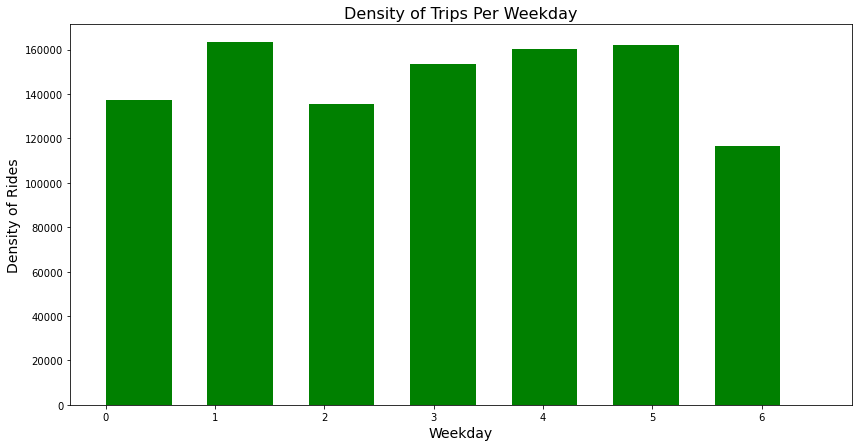

In [10]:
# Let visualize the Density of rides per Weekday
fig, ax = plt.subplots(figsize = (14, 7))
plt.hist(df.Weekday, width = 0.6, range = (0, 6.5), bins =7, color = "green")
plt.title("Density of Trips Per Weekday", fontsize = 16)
plt.xlabel("Weekday", fontsize = 14)
plt.ylabel("Density of Rides", fontsize = 14)

According to the above plot, the busiest day in the week for Uber is Monday. On the other hand, Saturday is the day with the lowest number of rides.

Text(0, 0.5, 'Density of Rides')

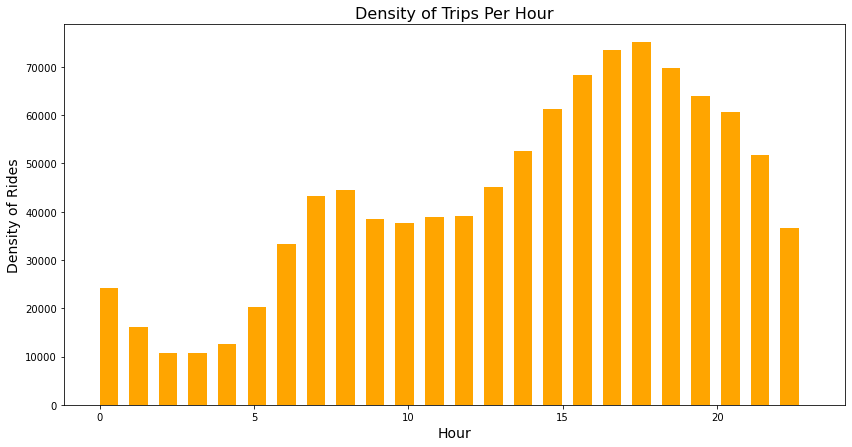

In [11]:
# Visualizing the Density of rides per hour
fig, ax = plt.subplots(figsize = (14, 7))
plt.hist(df.Hour, width = 0.6, bins = 24, color = "orange")
plt.title("Density of Trips Per Hour", fontsize = 16)
plt.xlabel("Hour", fontsize = 14)
plt.ylabel("Density of Rides", fontsize = 14)

It seems like the number of rides taken by uber decrease gradually from 1 AM to 4 PM and then increases starting from 5 AM onward till it reaches 6 PM which is the hour with the highest number of rides.

Text(0, 0.5, 'Density of Rides')

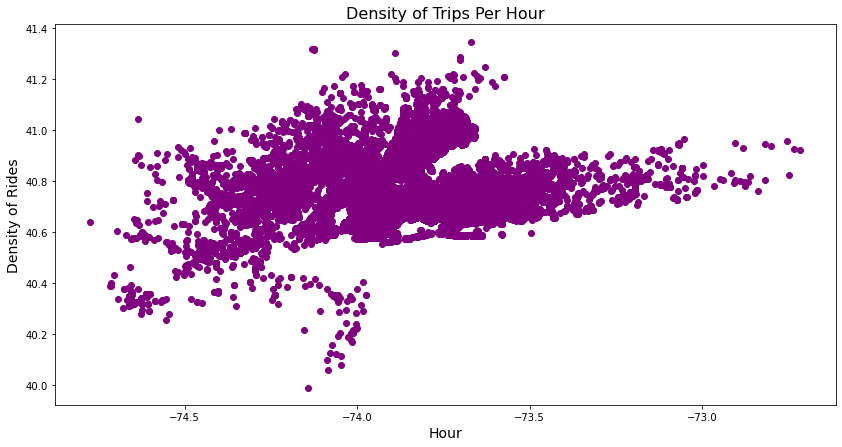

In [12]:
# Visualizing the Density of rides per Location
fig, ax = plt.subplots(figsize = (14, 7))
plt.scatter(x= df.Lon, y = df.Lat, color = "purple")
plt.title("Density of Trips Per Hour", fontsize = 16)
plt.xlabel("Hour", fontsize = 14)
plt.ylabel("Density of Rides", fontsize = 14)

The region with the highest density of rides is near Manhattan and Newburgh. While the region with the lowest density is near New Jersey.